# Calculate optimal 2 by 2 with 30 degree angles

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
from metabatt.utils import calculate_beam_lengths
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

In [2]:
cell_size = [2, 2]
original_angles = [0, 30, 60, 90, 120, 150, 180]
lengths, angles = calculate_beam_lengths(cell_size, original_angles)

# we start from scratch here
print(f"{lengths=} {angles=}")

# start by making an empty unit cell
graph = Graph(n_cells_w=3,  # dimension width
              n_cells_h=3,  # dimension height
              node_size=1e-2,
              eps_edge_overlaps=1e-3,
              max_edge_length=1.5, # reduces computational time if known
              pbc=[True, True]) # apply periodic boundary conditions

if not any(node.node_id == 0 for node in graph.nodes): graph.add_node(node_id=0, position=[0.0, 0.0])
if not any(node.node_id == 1 for node in graph.nodes): graph.add_node(node_id=1, position=[1.0, 0.0])
graph.add_edge(Edge(graph.get_node(0), graph.get_node(1), graph))

graph.assign_rotation_to_nodes()
graph.bend_edges()

lengths=[0.5, 1.0, 1.118033988749895] angles=[0, 26.565051177077994, 90, 153.434948822922, 180]


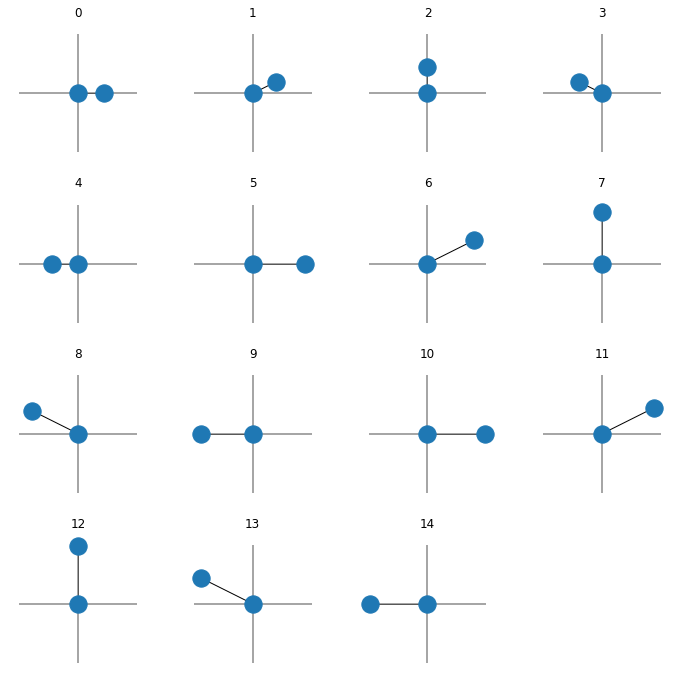

In [5]:
Subgraphs(angles, lengths).visualize()

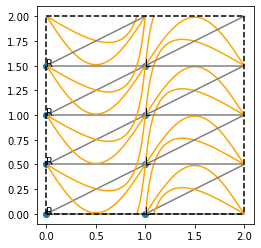

In [5]:
def add_subgraph(graph, angles, lengths, node_idx, angle_idx, lenght_idx):
    subgraph = Subgraphs(angles, lengths, node=graph.get_node(node_idx)).get_subgraph(angles[angle_idx], lengths[lenght_idx])
    graph.add_subgraph_to_node(graph.get_node(node_idx), subgraph)
    
add_subgraph(graph, angles, lengths, 1, 0, 1)
add_subgraph(graph, angles, lengths, 0, 1, 2)
add_subgraph(graph, angles, lengths, 1, 1, 2)

add_subgraph(graph, angles, lengths, 2, 0, 1)
add_subgraph(graph, angles, lengths, 3, 0, 1)
add_subgraph(graph, angles, lengths, 2, 1, 2)
add_subgraph(graph, angles, lengths, 3, 1, 2)

add_subgraph(graph, angles, lengths, 4, 0, 1)
add_subgraph(graph, angles, lengths, 5, 0, 1)
add_subgraph(graph, angles, lengths, 4, 1, 2)
add_subgraph(graph, angles, lengths, 5, 1, 2)

add_subgraph(graph, angles, lengths, 6, 0, 1)
add_subgraph(graph, angles, lengths, 7, 0, 1)
add_subgraph(graph, angles, lengths, 6, 1, 2)
add_subgraph(graph, angles, lengths, 7, 1, 2)

graph.plot()

In [6]:
area = graph.x_size * graph.y_size
reward = graph.total_edge_length()/area
print(f"{reward=}")

reward=6.137175812298154


5.79504125314495

In [15]:
load_agent = QAgentReplayMemory.from_hyperparameters('hyperparams')
best_model = load_agent.load_model(file_name='model')

# load_agent.predict(model=best_model, num_episodes=20, epsilon=0, save_best_graph=False)

In [18]:
load_agent.get_graph_state()

array([[1., 0., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])